In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
db=pd.read_csv("titanic.csv")
db.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Death percentage

In [2]:
total_deaths=db["Survived"][db.Survived==0].count()
total_deaths
total_passengers=db.Survived.count()
death_percent=(total_deaths/total_passengers)*100
print("Death percentage",death_percent)

Death percentage 61.61616161616161


Total 61.61616161 % of deaths were there due to titanic's sinking

Gender wise death percentage

In [3]:
male_deaths=db["Survived"][(db.Sex=="male")&(db.Survived==0)].count()
female_deaths=db["Survived"][(db.Sex=="female")&(db.Survived==0)].count()
male_death_percentage=(male_deaths/total_deaths)*100
female_death_percentage=(female_deaths/total_deaths)*100
print("Male death percentage:",male_death_percentage)
print("Female death percentage:",female_death_percentage)



Male death percentage: 85.24590163934425
Female death percentage: 14.754098360655737


Visualising Death percentage basis of Class

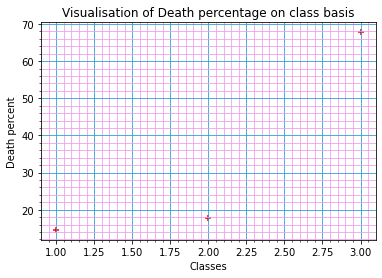

In [4]:
db.Pclass.dropna()
classes=db.Pclass.unique()
count_classes=[]
for i in classes:
    count_classes.append(((db[(db.Pclass==i)&(db.Survived==0)]["Pclass"].count())/total_deaths)*100)
plt.scatter(classes,count_classes,marker="+",color="Red")
plt.minorticks_on()
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.xlabel("Classes");
plt.ylabel("Death percent");
plt.title("Visualisation of Death percentage on class basis");

From above we conclude that passenger's class 3 faced most deaths

Visualising deaths basis of solo and group travelling

In [5]:
db.SibSp.dropna()
category=["Solo","Group"]
category_deaths=[]
solo_deaths=db[(db.Survived==0) & (db.SibSp==0)].Survived.count()
group_deaths=db[(db.Survived==0) & (db.SibSp!=0)].Survived.count()
category_deaths.append(solo_deaths)
category_deaths.append(group_deaths)
print("Solo deaths are:",solo_deaths)
print("Group deaths are:",group_deaths)


Solo deaths are: 398
Group deaths are: 151


Difference in deaths: 247 (Solo deaths being more)


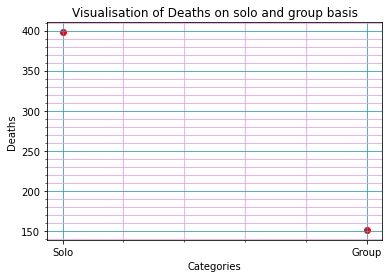

In [6]:
plt.scatter(category,category_deaths,marker="o",color="red");
plt.minorticks_on()
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.xlabel("Categories");
plt.ylabel("Deaths");
plt.title("Visualisation of Deaths on solo and group basis");
print("Difference in deaths:",solo_deaths-group_deaths,"(Solo deaths being more)")


Travellers that boarded alone survived less than thos who boarded on group 

Classes based analysis of solo deaths

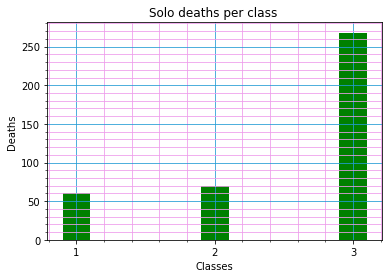

In [7]:
classes=db.Pclass.unique()
death_byclassess=[]
for i in classes:
    death_byclassess.append(db[(db.Survived==0)&(db.Pclass==i)&(db.SibSp==0)].Survived.count())
plt.bar(classes,death_byclassess,color="green",width=0.2);
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Solo deaths per class ");
plt.xlabel("Classes");
plt.ylabel("Deaths");
plt.xticks([1,2,3]);

From above bar graph we conclude that Class 3 had a major number of solo deaths

Classes based analysis of group deaths

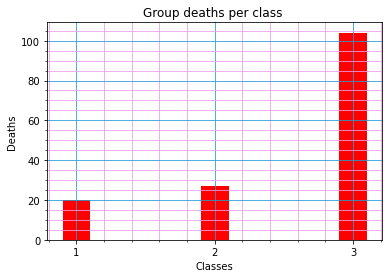

In [8]:
classes=db.Pclass.unique()
death_byclasses=[]
for i in classes:
    death_byclasses.append(db[(db.Survived==0)&(db.Pclass==i)&(db.SibSp!=0)].Survived.count())
plt.bar(classes,death_byclasses,color="Red",width=0.2);
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Group deaths per class ");
plt.xlabel("Classes");
plt.ylabel("Deaths");
plt.xticks([1,2,3]);

From above graph we conclude that maximum group deaths occured in class 3

Comparing Solo and Group deaths

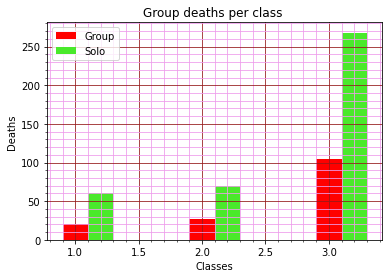

In [9]:
plt.bar(classes,death_byclasses,color="#FF0000",width=0.2,label="Group");
plt.bar(classes+0.2,death_byclassess,color="#4AE92B",width=0.2,label="Solo");
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#951A1A")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Group deaths per class ");
plt.xlabel("Classes");
plt.ylabel("Deaths");
plt.legend();

It is clear from above graph that class 3 suffered the most deaths from which we can conclude it had the largest impact

Number of deaths agewise

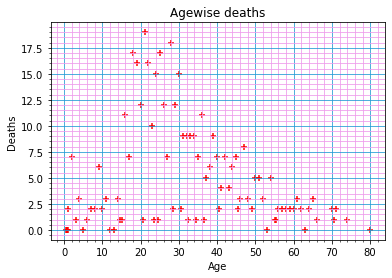

In [10]:
db.dropna()
age=db.Age.dropna().unique()
survive=[]
for i in age:
    survive.append(db[(db.Age==i)&(db.Survived==0)].Survived.count())
plt.scatter(age,survive,marker="+",color="Red");
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Agewise deaths");
plt.xlabel("Age");
plt.ylabel("Deaths");

    

Percentage of youths that died

In [11]:
count_of_survived_youth=db[(db.Age>=18)&(db.Age<=25)&(db.Survived==0)].Survived.count()
count_of_lost_youth=db[(db.Age>=18)&(db.Age<=25)].Age.count()
print("Percentage of youths that died:",((count_of_survived_youth/count_of_lost_youth)*100))

Percentage of youths that died: 66.48936170212765


Survival rate based on fare

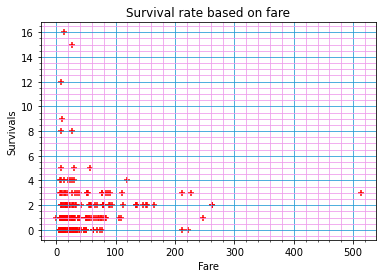

In [12]:
fare=db.Fare.dropna().unique()
deaths_per_fare=[]
for i in fare:
    deaths_per_fare.append(db[(db.Fare==i)&(db.Survived==1)].Survived.count())
deaths_per_fare
plt.scatter(fare,deaths_per_fare,marker="+",color="Red")
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#249CD5")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Survival rate based on fare");
plt.xlabel("Fare");
plt.ylabel("Survivals");
plt.show();


Price of each death

In [13]:
fare=db[db.Survived==0].Fare
Sum_fare=sum(fare)
print("Average cost of each death:",(Sum_fare/len(fare)))

Average cost of each death: 22.117886885245877


Deaths and survival count based on the place from where people embarked

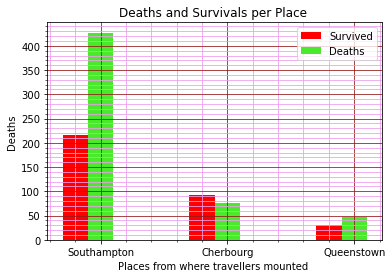

In [14]:
embarked=["Southampton","Cherbourg","Queenstown"]
counts=[]
countd=[]
X_axis = np.arange(len(embarked))
counts.append(db[(db.Survived==1)&(db.Embarked=='S')].Survived.count())
countd.append(db[(db.Survived==0)&(db.Embarked=='S')].Survived.count())
counts.append(db[(db.Survived==1)&(db.Embarked=='C')].Survived.count())
countd.append(db[(db.Survived==0)&(db.Embarked=='C')].Survived.count())
counts.append(db[(db.Survived==1)&(db.Embarked=='Q')].Survived.count())
countd.append(db[(db.Survived==0)&(db.Embarked=='Q')].Survived.count())
plt.bar(X_axis-0.2,counts,color="#FF0000",width=0.2,label="Survived");
plt.bar(X_axis,countd,color="#4AE92B",width=0.2,label="Deaths");
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#951A1A")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Deaths and Survivals per Place ");
plt.xlabel("Places from where travellers mounted ");
plt.ylabel("Deaths");
plt.xticks(X_axis, embarked)
plt.legend();



It is clear from above graph that most casualities as well as as survivors boarded from Southampton

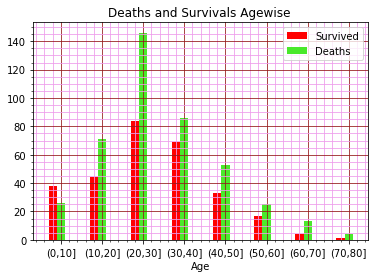

In [29]:
age_set=["(0,10]","(10,20]","(20,30]","(30,40]","(40,50]","(50,60]","(60,70]","(70,80]"]
counts=[]
countd=[]
X_axis = np.arange(len(age_set))
counts.append(db[(db.Survived==1)&(db.Age>=0)&(db.Age<=10)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>=0)&(db.Age<=10)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>10)&(db.Age<=20)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>10)&(db.Age<=20)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>20)&(db.Age<=30)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>20)&(db.Age<=30)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>30)&(db.Age<=40)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>30)&(db.Age<=40)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>40)&(db.Age<=50)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>40)&(db.Age<=50)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>50)&(db.Age<=60)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>50)&(db.Age<=60)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>60)&(db.Age<=70)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>60)&(db.Age<=70)].Survived.count())
counts.append(db[(db.Survived==1)&(db.Age>70)&(db.Age<=80)].Survived.count())
countd.append(db[(db.Survived==0)&(db.Age>70)&(db.Age<=80)].Survived.count())
plt.bar(X_axis-0.2,counts,color="#FF0000",width=0.2,label="Survived");
plt.bar(X_axis,countd,color="#4AE92B",width=0.2,label="Deaths");
plt.minorticks_on();
plt.grid(which="major",axis="both",c="#951A1A")
plt.grid(which="minor",axis="both",c="#EE9DEB")
plt.title("Deaths and Survivals Agewise ");
plt.xlabel("Age");
plt.xticks(X_axis, age_set)
plt.legend();



A larger fraction of children under 10 survived than died